In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_excel('datasetProf.xlsx')
df=df.dropna() #toglie le righe dove ci sono ISIG o GLICEMIA nulli
df["timestamp"]=df['Date'].astype(str) +" "+ df["Time"].astype(str)
df=df.drop(axis=1,labels="Date")
df=df.drop(axis=1,labels="Time")
df.set_index("timestamp",drop=True,inplace=True)
df.sort_values(by=['timestamp'], inplace = True)
print(df.index)

#df.index = pd.to_datetime(df.index)
q25, q75 = percentile(df, 25), percentile(df, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
df=df.loc[df['Sensor Glucose (mg/dL)']>lower]
df=df.loc[df['Sensor Glucose (mg/dL)']<upper]

import datetime

start_train = str(datetime.datetime(2022, 2, 1,0,0))
end_train = str(datetime.datetime(2022, 3, 14, 0, 0)) #un mese e due settimane per il training
start_test = str(datetime.datetime(2022, 3, 15,0,0))
end_test = str(datetime.datetime(2022, 4, 3 , 0, 0)) #tre settimane per il testing
start_validation=str(datetime.datetime(2022, 4, 4, 0, 0))
end_validation = str(datetime.datetime(2022, 4, 5, 23, 0)) #due giorni per la validazione

#Prendiamo i dati necessari per il training
df_train=df.loc[start_train:end_train]

#Prendiamo i dati necessari per il testing
df_test=df.loc[start_test:end_test]
Y_test2=df_test["Sensor Glucose (mg/dL)"].values

#Prendiamo i dati per la validazione
df_validation=df.loc[start_validation:end_validation]

Index(['2022-02-01 23:05:00', '2022-02-01 23:10:01', '2022-02-01 23:15:00',
       '2022-02-01 23:20:09', '2022-02-01 23:25:01', '2022-02-01 23:30:00',
       '2022-02-01 23:35:01', '2022-02-01 23:40:00', '2022-02-01 23:45:01',
       '2022-02-01 23:50:01',
       ...
       '2022-04-05 18:54:48', '2022-04-05 18:54:48', '2022-04-05 18:55:00',
       '2022-04-05 18:57:19', '2022-04-05 19:02:19', '2022-04-05 19:07:47',
       '2022-04-05 19:12:27', '2022-04-05 19:17:19', '2022-04-05 19:19:16',
       '2022-04-05 19:24:02'],
      dtype='object', name='timestamp', length=14151)


In [ ]:
look_back = 3 #ho provato 3-5-10-20 il migliore è 3 
X_train, Y_train = [], []
df_trainX=df_train.drop("Sensor Glucose (mg/dL)", axis=1).values
df_trainY=df_train.get(["Sensor Glucose (mg/dL)"])
#X_train=np.array(X_train)
df_trainY=df_trainY.reset_index(drop=True)
Y_array=df_trainY.to_numpy()

norm1=StandardScaler()
norm1.fit(df_train)
df_train=norm1.transform(df_train)

print(Y_array)  

for i in range(len(Y_array)-look_back-1):
  a=df_trainX[i:(i+look_back)][:]
  X_train.append(a) #al primo ciclo avrò i primi 15 valori di ISIG e Boli
  Y_train.append(Y_array[i + look_back]) #al primo ciclo avrò il 16° valore del glucosio

np.array(X_train), np.array(Y_train)

[[185.]
 [186.]
 [186.]
 ...
 [202.]
 [202.]
 [202.]]


(array([[[ 0.15 , 33.11 ],
         [ 0.175, 32.84 ],
         [ 0.15 , 32.81 ]],
 
        [[ 0.175, 32.84 ],
         [ 0.15 , 32.81 ],
         [ 0.23 , 33.16 ]],
 
        [[ 0.15 , 32.81 ],
         [ 0.23 , 33.16 ],
         [ 0.175, 33.45 ]],
 
        ...,
 
        [[ 0.   , 29.29 ],
         [ 0.225, 28.47 ],
         [ 0.2  , 28.13 ]],
 
        [[ 0.225, 28.47 ],
         [ 0.2  , 28.13 ],
         [ 0.2  , 29.18 ]],
 
        [[ 0.2  , 28.13 ],
         [ 0.2  , 29.18 ],
         [ 0.   , 29.15 ]]]), array([[187.],
        [189.],
        [191.],
        ...,
        [200.],
        [202.],
        [202.]]))

In [ ]:
X_test, Y_test = [], []
df_testX=df_test.drop("Sensor Glucose (mg/dL)", axis=1).values
df_testY=df_test.get(["Sensor Glucose (mg/dL)"])
#X_train=np.array(X_train)
df_testY=df_testY.reset_index(drop=True)
Y_array=df_testY.to_numpy()

df_test=norm1.transform(df_test)

print(Y_array)  

for i in range(len(Y_array)-look_back-1):
  a=df_testX[i:(i+look_back)][:]
  X_test.append(a)
  Y_test.append(Y_array[i + look_back])

np.array(X_test), np.array(Y_test)

[[114.]
 [113.]
 [113.]
 ...
 [107.]
 [106.]
 [107.]]


(array([[[ 0.   , 18.8  ],
         [ 0.   , 18.95 ],
         [ 0.2  , 19.1  ]],
 
        [[ 0.   , 18.95 ],
         [ 0.2  , 19.1  ],
         [ 0.225, 19.23 ]],
 
        [[ 0.2  , 19.1  ],
         [ 0.225, 19.23 ],
         [ 0.1  , 19.14 ]],
 
        ...,
 
        [[ 0.025, 20.81 ],
         [ 0.05 , 20.62 ],
         [ 0.1  , 20.48 ]],
 
        [[ 0.05 , 20.62 ],
         [ 0.1  , 20.48 ],
         [ 0.1  , 20.45 ]],
 
        [[ 0.1  , 20.48 ],
         [ 0.1  , 20.45 ],
         [ 0.   , 20.47 ]]]), array([[113.],
        [112.],
        [111.],
        ...,
        [106.],
        [107.],
        [106.]]))

In [ ]:
X_validation, Y_validation = [], []
df_validationX=df_validation.drop("Sensor Glucose (mg/dL)", axis=1).values
df_validationY=df_validation.get(["Sensor Glucose (mg/dL)"])
#X_train=np.array(X_train)
df_validationY=df_validationY.reset_index(drop=True)
Y_array=df_validationY.to_numpy()

df_validation=norm1.transform(df_validation)

for i in range(len(Y_array)-look_back-1):
  a=df_validationX[i:(i+look_back)][:]
  X_validation.append(a)
  Y_validation.append(Y_array[i + look_back])

np.array(X_validation), np.array(Y_validation)

(array([[[ 0.  , 19.08],
         [ 0.  , 18.82],
         [ 0.  , 19.39]],
 
        [[ 0.  , 18.82],
         [ 0.  , 19.39],
         [ 0.  , 19.66]],
 
        [[ 0.  , 19.39],
         [ 0.  , 19.66],
         [ 0.05, 19.88]],
 
        ...,
 
        [[ 0.1 , 23.49],
         [ 0.1 , 23.89],
         [ 0.69, 24.51]],
 
        [[ 0.1 , 23.89],
         [ 0.69, 24.51],
         [ 0.19, 25.43]],
 
        [[ 0.69, 24.51],
         [ 0.19, 25.43],
         [ 0.1 , 26.6 ]]]), array([[122.],
        [123.],
        [124.],
        [125.],
        [125.],
        [124.],
        [124.],
        [124.],
        [124.],
        [125.],
        [125.],
        [124.],
        [122.],
        [120.],
        [120.],
        [120.],
        [118.],
        [114.],
        [112.],
        [109.],
        [107.],
        [110.],
        [115.],
        [123.],
        [135.],
        [143.],
        [146.],
        [148.],
        [145.],
        [142.],
        [143.],
        [151.],
      

In [ ]:
# create and fit the LSTM 
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [ ]:
print(X_train[0:10])
print("FINITO")
print(X_test[0:10])

[array([[ 0.15 , 33.11 ],
       [ 0.175, 32.84 ],
       [ 0.15 , 32.81 ]]), array([[ 0.175, 32.84 ],
       [ 0.15 , 32.81 ],
       [ 0.23 , 33.16 ]]), array([[ 0.15 , 32.81 ],
       [ 0.23 , 33.16 ],
       [ 0.175, 33.45 ]]), array([[ 0.23 , 33.16 ],
       [ 0.175, 33.45 ],
       [ 0.15 , 33.67 ]]), array([[ 0.175, 33.45 ],
       [ 0.15 , 33.67 ],
       [ 0.175, 33.59 ]]), array([[ 0.15 , 33.67 ],
       [ 0.175, 33.59 ],
       [ 0.15 , 33.28 ]]), array([[ 0.175, 33.59 ],
       [ 0.15 , 33.28 ],
       [ 0.175, 32.92 ]]), array([[ 0.15 , 33.28 ],
       [ 0.175, 32.92 ],
       [ 0.175, 32.63 ]]), array([[ 0.175, 32.92 ],
       [ 0.175, 32.63 ],
       [ 0.075, 32.39 ]]), array([[ 0.175, 32.63 ],
       [ 0.075, 32.39 ],
       [ 0.   , 31.92 ]])]
FINITO
[array([[ 0.  , 18.8 ],
       [ 0.  , 18.95],
       [ 0.2 , 19.1 ]]), array([[ 0.   , 18.95 ],
       [ 0.2  , 19.1  ],
       [ 0.225, 19.23 ]]), array([[ 0.2  , 19.1  ],
       [ 0.225, 19.23 ],
       [ 0.1  , 19.14 ]

In [ ]:
# reshape input to be [samples, time steps, features] (form for neural network)
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 2, 3))
X_test = np.asarray(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 2, 3))
X_validation = np.asarray(X_validation)
X_validation = np.reshape(X_validation, (X_validation.shape[0], 2, 3))
Y_validation = np.asarray(Y_validation)
Y_test = np.asarray(Y_test)

model = Sequential()
model.add(LSTM(4, input_shape=(2, look_back)))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
#questa è la miglior impostazione della rete neurale per avere ottimi risultati, tra l'altro al secondo passo sta praticamente al massimo della sua efficienza
checkpoint = ModelCheckpoint("prevision.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="mean_squared_error", optimizer=RMSprop(learning_rate=0.001))

print(len(X_train))

history=model.fit(np.array(X_train),np.array(Y_train), validation_data=(X_test, Y_test), epochs=35,batch_size=1,verbose=2) 

# make predictions
#trainPredict = model.predict(X_train)
#testPredict = model.predict(X_test)

8858
Epoch 1/35
8858/8858 - 23s - loss: 4527.5918 - val_loss: 626.0235 - 23s/epoch - 3ms/step
Epoch 2/35
8858/8858 - 20s - loss: 329.7968 - val_loss: 443.3872 - 20s/epoch - 2ms/step
Epoch 3/35
8858/8858 - 20s - loss: 313.8413 - val_loss: 421.7063 - 20s/epoch - 2ms/step
Epoch 4/35
8858/8858 - 26s - loss: 311.7811 - val_loss: 456.1973 - 26s/epoch - 3ms/step
Epoch 5/35
8858/8858 - 20s - loss: 313.1410 - val_loss: 435.7630 - 20s/epoch - 2ms/step
Epoch 6/35
8858/8858 - 20s - loss: 308.9019 - val_loss: 453.8680 - 20s/epoch - 2ms/step
Epoch 7/35
8858/8858 - 20s - loss: 308.1944 - val_loss: 503.0923 - 20s/epoch - 2ms/step
Epoch 8/35
8858/8858 - 20s - loss: 300.7002 - val_loss: 432.7355 - 20s/epoch - 2ms/step
Epoch 9/35
8858/8858 - 20s - loss: 297.8513 - val_loss: 474.9938 - 20s/epoch - 2ms/step
Epoch 10/35
8858/8858 - 20s - loss: 297.1595 - val_loss: 490.7248 - 20s/epoch - 2ms/step
Epoch 11/35
8858/8858 - 20s - loss: 296.7276 - val_loss: 436.9201 - 20s/epoch - 2ms/step
Epoch 12/35
8858/8858 - 

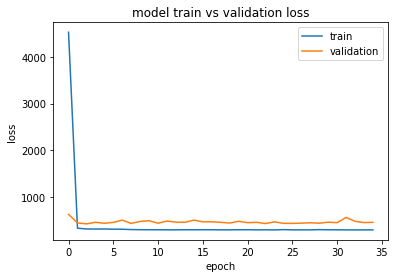

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
testPredict = model.predict(X_validation)

14/14 [==============================] - 1s 2ms/step


In [ ]:
oneDay_start=str(datetime.datetime(2022,4,4,0,0))
oneDay_end=str(datetime.datetime(2022,4,4,23,59))
df_One=df.loc[oneDay_start:oneDay_end] #mi serve per la lunghezza dell'ultimo giorno

#lastDayStart=str(datetime.datetime(2022,4,5,0,0))
#lastDayEnd=str(datetime.datetime(2022,4,5,23,59))
#df_Last=df.loc[lastDayStart:lastDayEnd]

Y_One=df_One["Sensor Glucose (mg/dL)"].values
#lengthOne=len(Y_One) #numero di osservazioni penultimo giorno (ovvero il giorno che voglio osservare)
#lengthLast=len(df_Last) #numero di osservazioni l'ultimo giorno

#Y_predOneLSTM=testPredict[(len(testPredict)-lengthLast-lengthOne):(len(testPredict)-lengthLast)] #parto dalla fine-gli elementi dell'ultimo giorno- gli elementi del penultimo giorno fino a (fine-elementi ultimo giorno)
#Y_predOneLSTM=np.flip(Y_predOneLSTM)



([<matplotlib.axis.XTick at 0x7f31e49192d0>,
 <a list of 41 Text major ticklabel objects>)

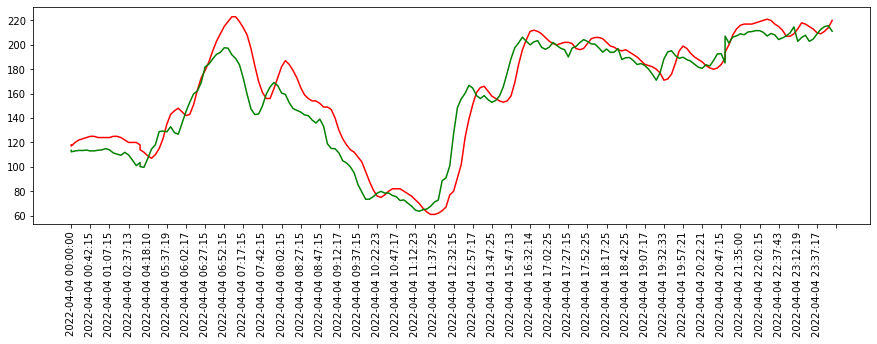

In [ ]:
#ADESSO PRENDO L'ULTIMO GIORNO DA GRAFICARE CHE USO PRIMA PER FARE LA VALIDAZIONE

fig=plt.figure()
fig.set_figwidth(15)
labels = df_One.index
plt.plot(labels[:len(Y_One)],Y_One,color='red')
plt.plot(labels[:len(Y_One)],testPredict[:len(Y_One)],color='green')
plt.xticks(rotation=90) #i xticks sono i 'tick' sull'asse delle x, rotation=90 è per metterli in verticale
plt.xticks(np.arange(0, len(labels), 5))